# Find Numbers in Hebrew Bible

This in response to an inquiry by James Bejon on Twitter:

https://twitter.com/JamesBejon/status/1278314278169313285?s=20


In [1]:
# import Text-Fabric app
from tf.app import use 

# import data stuff
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# load TF data for HB
bhsa = use('bhsa') # downloads or loads data as needed

# set up a few shorthands for TF methods
F = bhsa.api.F # for feature requests on node integers
L = bhsa.api.L # navigates to container/ed nodes
T = bhsa.api.T # configs plain text on nodes

In [3]:
# run a TF query search
# include some additional objects to make
# dataset export easy
numbs = bhsa.search('''

word ls=card|ordn

''')

  0.43s 7013 results


In [23]:
# set up a dataset for use with Pandas
dataset = []

for result in numbs:
    numb_node = result[0]
    lex_node = L.u(numb_node,'lex')[0]
    phrase_node = L.u(numb_node,'phrase')[0]
    sentence_node = L.u(numb_node,'sentence')[0]
    dataset.append({
        "reference": bhsa.sectionStrFromNode(numb_node),
        "book": T.sectionFromNode(numb_node)[0],
        "kind": F.ls.v(numb_node),
        "number": T.text(numb_node, fmt='lex-orig-plain').strip(),
        "numb_text": T.text(numb_node),
        "phrase": T.text(phrase_node),
        "sentence": T.text(sentence_node),
        "phrase_funct": F.function.v(phrase_node), 
    })

In [24]:
numb_df = pd.DataFrame(dataset)

In [25]:
numb_df.head()

,reference,book,kind,number,numb_text,phrase,sentence,phrase_funct
0,Genesis 1:5,Genesis,card,אחד,אֶחָֽד׃ פ,יֹ֥ום אֶחָֽד׃ פ,יֹ֥ום אֶחָֽד׃ פ,PreC
1,Genesis 1:8,Genesis,ordn,שׁני,שֵׁנִֽי׃ פ,יֹ֥ום שֵׁנִֽי׃ פ,יֹ֥ום שֵׁנִֽי׃ פ,PreC
2,Genesis 1:9,Genesis,card,אחד,אֶחָ֔ד,אֶל־מָקֹ֣ום אֶחָ֔ד,יִקָּו֨וּ הַמַּ֜יִם מִתַּ֤חַת הַשָּׁמַ֨יִם֙ אֶ...,Cmpl
3,Genesis 1:13,Genesis,ordn,שׁלישׁי,שְׁלִישִֽׁי׃ פ,יֹ֥ום שְׁלִישִֽׁי׃ פ,יֹ֥ום שְׁלִישִֽׁי׃ פ,PreC
4,Genesis 1:16,Genesis,card,שׁנים,שְׁנֵ֥י,אֶת־שְׁנֵ֥י הַמְּאֹרֹ֖ת הַגְּדֹלִ֑ים אֶת־הַמָּ...,וַיַּ֣עַשׂ אֱלֹהִ֔ים אֶת־שְׁנֵ֥י הַמְּאֹרֹ֖ת ה...,Objc


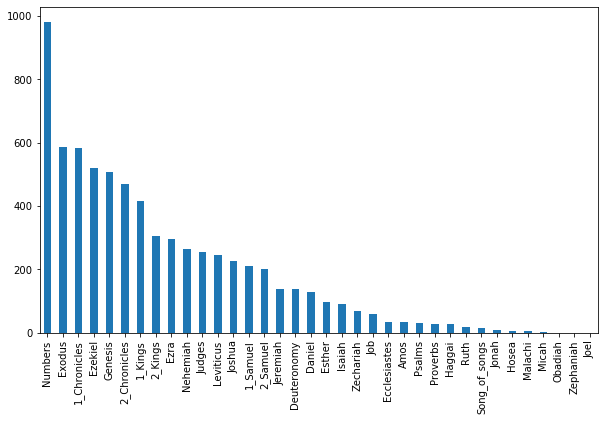

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))

numb_df.book.value_counts().plot(kind='bar', ax=ax)

Do by kind

In [30]:
book_counts = pd.pivot_table(
    numb_df,
    index='book',
    columns=['kind'],
    aggfunc='size',
    fill_value=0,
)

# sort on size
book_counts = book_counts.loc[book_counts.sum(1).sort_values(ascending=False).index]

book_counts

kind,card,ordn
book,,
Numbers,912,67
Exodus,517,69
1_Chronicles,479,104
Ezekiel,491,30
Genesis,461,45
2_Chronicles,434,34
1_Kings,379,37
2_Kings,285,22
Ezra,280,16


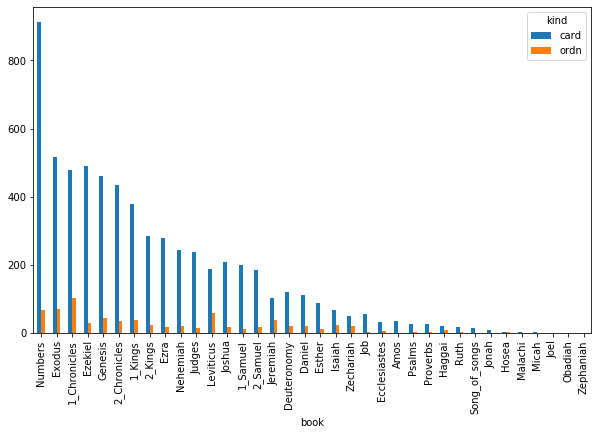

In [32]:
fig, ax = plt.subplots(figsize=(10, 6))

book_counts.plot(kind='bar', ax=ax)

In [34]:
# count by lexeme

lex_counts = numb_df.number.value_counts()

pd.DataFrame(lex_counts)

,number
אחד,970
שׁנים,768
שׁלשׁ,602
מאה,587
חמשׁ,506
אלף,496
שׁבע,496
ארבע,462
עשׂרים,315
שׁשׁ,274


In [35]:
# phrase functions
numb_df.phrase_funct.value_counts()

PreC    2221
Objc    1300
Subj    1194
Time    1166
Adju     503
Cmpl     385
Modi     114
Frnt      67
Loca      32
PrAd      26
PreO       5
Name: phrase_funct, dtype: int64

In [36]:
# export as csv
numb_df.to_csv('numbers_HB.csv')